# Exploratory & Visualization Analysis: Google Playstore Data

This project includes visualization of leading categories and identifying the highest correlation among specifics. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
google_playstore = pd.read_csv("C:/Users/Yosua/Downloads/Playstore_final.csv", error_bad_lines=False)

C:\Users\Yosua\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
google_playstore.shape

(450795, 19)

In [4]:
google_playstore.describe()

,Rating,Rating Count,Minimum Installs,Price,Reviews,Developer Internal ID
count,447983.000000,3.320270e+05,4.507820e+05,450703.000000,4.479830e+05,4.507820e+05
mean,3.018803,1.942923e+04,8.836482e+05,0.315508,5.118334e+03,6.932299e+18
std,1.860017,6.642906e+05,3.607626e+07,4.110261,1.993113e+05,1.342448e+18
min,0.000000,3.000000e+00,0.000000e+00,0.000000,0.000000e+00,4.611690e+18
25%,0.000000,2.400000e+01,5.000000e+02,0.000000,0.000000e+00,5.771980e+18
50%,3.933333,1.230000e+02,5.000000e+03,0.000000,1.700000e+01,6.939070e+18
75%,4.390000,9.900000e+02,5.000000e+04,0.000000,1.780000e+02,8.109845e+18
max,5.000000,1.386210e+08,1.000000e+10,400.000000,5.237720e+07,9.223350e+18


In [5]:
google_playstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450795 entries, 0 to 450794
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   App Name               450782 non-null  object 
 1   App Id                 450795 non-null  object 
 2   Category               450782 non-null  object 
 3   Rating                 447983 non-null  float64
 4   Rating Count           332027 non-null  float64
 5   Installs               450704 non-null  object 
 6   Minimum Installs       450782 non-null  float64
 7   Free                   450703 non-null  object 
 8   Price                  450703 non-null  float64
 9   Currency               450703 non-null  object 
 10  Size                   450767 non-null  object 
 11  Released               447348 non-null  object 
 12  Last update            450795 non-null  object 
 13  Content Rating         450782 non-null  object 
 14  In app purchases       450795 non-nu

# Data Cleaning

In [6]:
google_playstore.isnull().sum()

App Name                     13
App Id                        0
Category                     13
Rating                     2812
Rating Count             118768
Installs                     91
Minimum Installs             13
Free                         92
Price                        92
Currency                     92
Size                         28
Released                   3447
Last update                   0
Content Rating               13
In app purchases              0
Reviews                    2812
Android version Text       1082
Developer                    16
Developer Internal ID        13
dtype: int64

Rating Count:
Ratings with missing values implies that no one has yet given it a rating. Therefore we will replace NaN with 0

In [7]:
google_playstore['Rating Count'] = google_playstore['Rating Count'].replace(np.nan, 0.0)

### Drop the column if data in column is missing for more than 60% of the observations

In [8]:
threshold = len(google_playstore)* 0.4
threshold

180318.0

In [9]:
google_playstore.dropna(thresh=threshold, axis=1, inplace=True)

In [10]:
google_playstore.isnull().sum()

App Name                   13
App Id                      0
Category                   13
Rating                   2812
Rating Count                0
Installs                   91
Minimum Installs           13
Free                       92
Price                      92
Currency                   92
Size                       28
Released                 3447
Last update                 0
Content Rating             13
In app purchases            0
Reviews                  2812
Android version Text     1082
Developer                  16
Developer Internal ID      13
dtype: int64

App Name/ Rating/ Installs :

In [11]:
#First let's drop rows where App Name is null
google_playstore = google_playstore[google_playstore['App Name'].notna()]

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

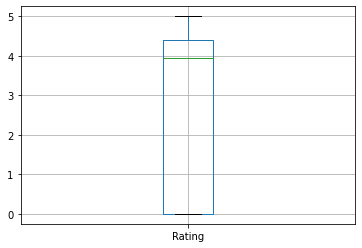

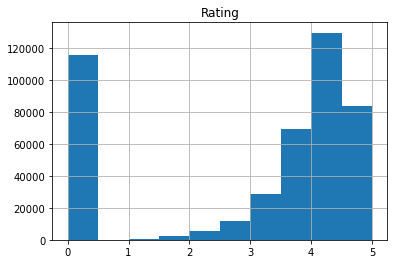

In [12]:
google_playstore.boxplot(column = 'Rating')
google_playstore.hist(column = 'Rating')
#For Ratings we can replace 0 with NaN because a 0 rating just means there is no rating.

In [13]:
#google_playstore['Rating'] = google_playstore["Rating"].replace({"0": np.nan}, inplace=True)
google_playstore['Rating'] = google_playstore['Rating'].replace(0.0, np.nan)

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

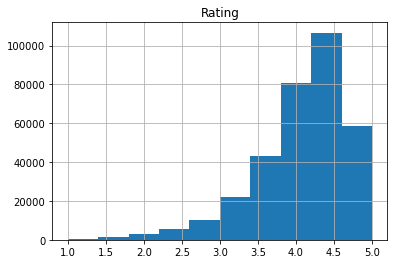

In [14]:
google_playstore.hist(column = 'Rating') # left skewed so we can replace/impute missing values with median

In [15]:
def impute_median(series):
    return series.fillna(series.median())

In [16]:
google_playstore['Rating'] = google_playstore['Rating'].transform(impute_median)

In [17]:
google_playstore['Installs'] = google_playstore['Installs'].apply(lambda x: str(x).replace('+', '') 
                                                                  if '+' in str(x) else str(x))
google_playstore['Installs'] = google_playstore['Installs'].apply(lambda x: str(x).replace(',', '') 
                                                                  if ',' in str(x) else str(x))

In [18]:
google_playstore.Installs.unique()
# google_playstore.hist(column = 'Installs')

array(['10000', '1000', '5000', '50000', '100000', '10', '500000',
       '1000000', '5', '100', '0', '500', '10000000', '5000000',
       '500000000', '50000000', '50', '100000000', '1', '1000000000',
       '5000000000', 'nan', '10000000000'], dtype=object)

<AxesSubplot:>

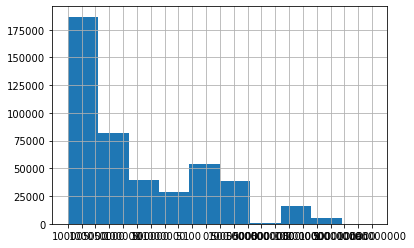

In [19]:
google_playstore['Installs'].hist() # Right skewed so we can replace/impute missing values with median

In [20]:
# But first let's convert object to float
google_playstore['Installs'] = google_playstore['Installs'].apply(lambda x: str(x))

In [21]:
google_playstore['Installs'] = google_playstore['Installs'].transform(impute_median)

Free/ Price/ Currency :

In [22]:
google_playstore['Free'].unique() #Replace null values to mode of Categorical values 

array([True, False, nan], dtype=object)

In [23]:
# Fill the missing categorical values with mode
google_playstore['Free'].mode()
google_playstore['Free'].fillna(str(google_playstore['Free'].mode().values[0]), inplace=True)

In [24]:
# Change object to boolean 

In [25]:
google_playstore['Free'] = google_playstore['Free'].astype('bool')

In [26]:
# Most apps are free so we can fill in null values with the mode given only very few rows with NaN
google_playstore['Price'].mode()
google_playstore['Price'].fillna(google_playstore['Price'].mode().values[0], inplace=True)

In [27]:
google_playstore['Currency'].value_counts() # Most apps are labeled in USD, so replace the null values with USD currency
google_playstore['Currency'].mode()
google_playstore['Currency'].fillna(google_playstore['Currency'].mode().values[0], inplace=True)

Rest of Columns :

In [28]:
# Categorical values 
google_playstore['Size'].fillna(google_playstore['Size'].mode().values[0], inplace=True)

In [29]:
# Convert object to datetime for columns Released and Last update:
google_playstore['Released'] = pd.to_datetime(google_playstore['Released'])
google_playstore['Last update'] = pd.to_datetime(google_playstore['Last update'])

In [30]:
# Replace Null values by devault most common year
google_playstore['Released'].mode()
google_playstore['Released'].fillna(google_playstore['Released'].mode().values[0], inplace=True)

In [31]:
google_playstore['Reviews'] = google_playstore['Reviews'].transform(impute_median)

In [32]:
# Fill the missing categorical values with mode 
google_playstore['Android version Text'].fillna(google_playstore['Android version Text'].mode().values[0], inplace=True)

In [33]:
google_playstore['Developer'] = google_playstore['Developer'].replace(np.nan, 'Unknown')

In [34]:
google_playstore.isnull().sum()

App Name                 0
App Id                   0
Category                 0
Rating                   0
Rating Count             0
Installs                 0
Minimum Installs         0
Free                     0
Price                    0
Currency                 0
Size                     0
Released                 0
Last update              0
Content Rating           0
In app purchases         0
Reviews                  0
Android version Text     0
Developer                0
Developer Internal ID    0
dtype: int64

# Data Visualization of Categories

In [35]:
group = google_playstore.groupby('Category')
Avg_Rating = group['Rating'].agg(np.mean).sort_values(ascending = False)
Sum_RatingCount = group['Rating Count'].agg(np.sum).sort_values(ascending = False)
Avg_Installs = group['Minimum Installs'].agg(np.mean).sort_values(ascending = False)
Sum_Price = group['Price'].agg(np.sum).sort_values(ascending = False)
Avg_Reviews = group['Reviews'].agg(np.mean).sort_values(ascending = False)

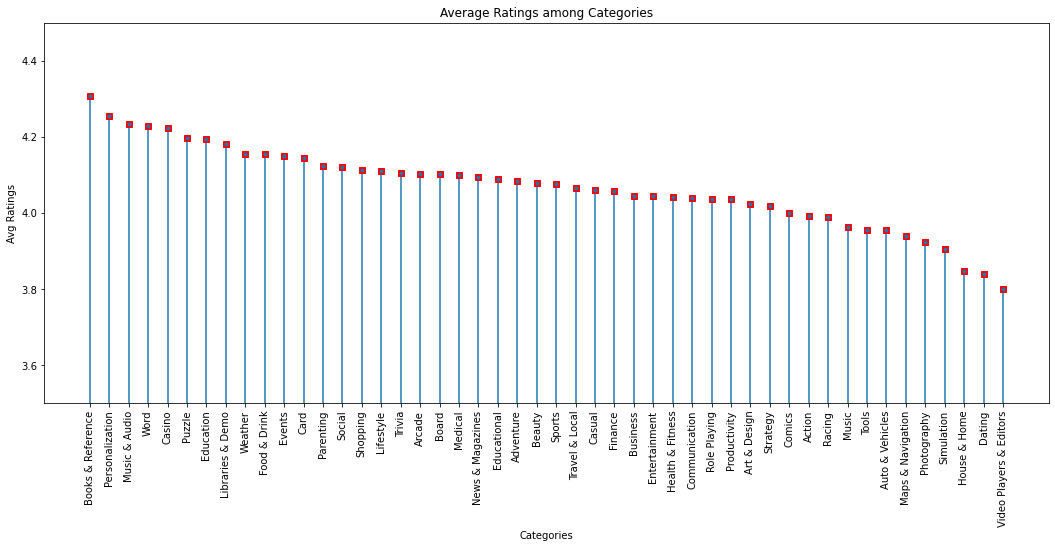

In [36]:
# Rating (Avg)
plt.figure(figsize=(18,7))
plt.plot(Avg_Rating,'bs', color='red')
plt.xticks(rotation=90)
plt.title('Average Ratings among Categories')
plt.xlabel('Categories')
plt.ylabel('Avg Ratings')

plt.stem(Avg_Rating, markerfmt='.')
plt.ylim([3.5, 4.5])
plt.show()

In [37]:
Avg_Rating

Category
Books & Reference          4.309088
Personalization            4.255256
Music & Audio              4.234372
Word                       4.229353
Casino                     4.224593
Puzzle                     4.196723
Education                  4.194222
Libraries & Demo           4.182423
Weather                    4.156068
Food & Drink               4.154259
Events                     4.150014
Card                       4.144851
Parenting                  4.122666
Social                     4.120817
Shopping                   4.113718
Lifestyle                  4.109630
Trivia                     4.106351
Arcade                     4.104097
Board                      4.103039
Medical                    4.101092
News & Magazines           4.094383
Educational                4.090042
Adventure                  4.085671
Beauty                     4.080086
Sports                     4.075942
Travel & Local             4.066529
Casual                     4.060643
Finance            

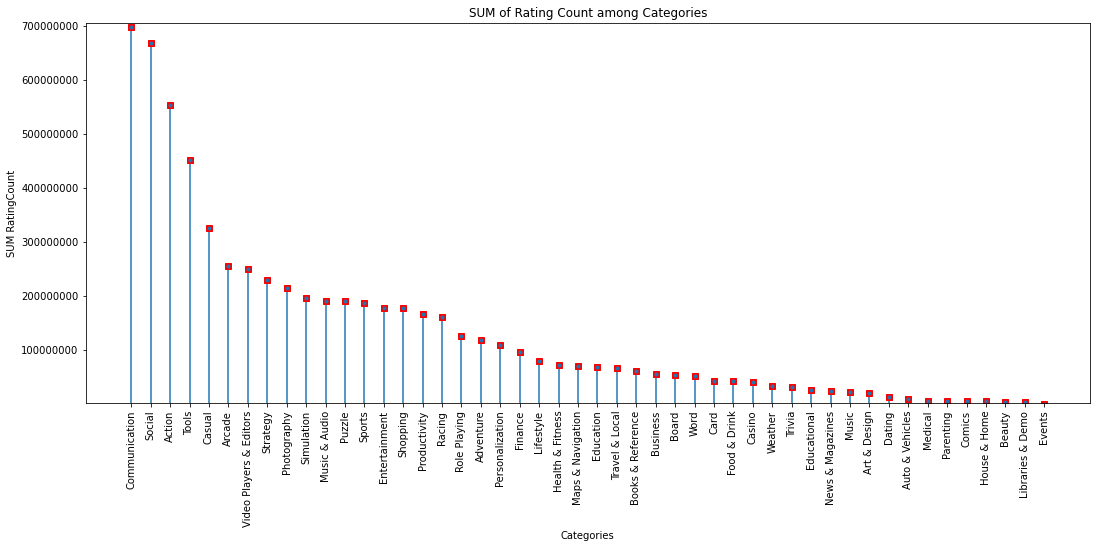

In [38]:
# RatingCount (SUM)
plt.figure(figsize=(18,7))
plt.plot(Sum_RatingCount,'bs', color='red')
plt.xticks(rotation=90)
plt.title('SUM of Rating Count among Categories')
plt.xlabel('Categories')
plt.ylabel('SUM RatingCount')

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

plt.stem(Sum_RatingCount, markerfmt='.')
plt.ylim([1000000, 705000000])
plt.show()

In [39]:
Sum_RatingCount

Category
Communication              697652379.0
Social                     667553044.0
Action                     553226574.0
Tools                      450574086.0
Casual                     325836924.0
Arcade                     254977351.0
Video Players & Editors    250061942.0
Strategy                   228528828.0
Photography                214704145.0
Simulation                 195792373.0
Music & Audio              191277009.0
Puzzle                     190517361.0
Sports                     185957052.0
Entertainment              177055983.0
Shopping                   176825367.0
Productivity               166774540.0
Racing                     160724452.0
Role Playing               125725067.0
Adventure                  117441129.0
Personalization            109406164.0
Finance                     96206400.0
Lifestyle                   78646422.0
Health & Fitness            72029668.0
Maps & Navigation           69819264.0
Education                   68453698.0
Travel & Local  

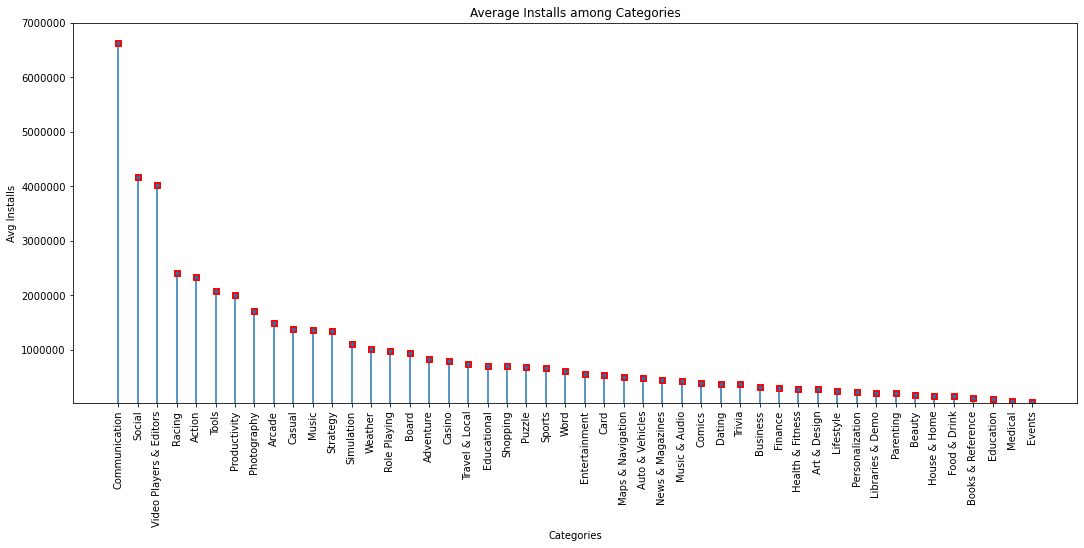

In [40]:
# Installs (Avg)
plt.figure(figsize=(18,7))
plt.plot(Avg_Installs,'bs', color='red')
plt.xticks(rotation=90)
plt.title('Average Installs among Categories')
plt.xlabel('Categories')
plt.ylabel('Avg Installs')

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

plt.stem(Avg_Installs, markerfmt='.')
plt.ylim([20000, 7000000])
plt.show()

In [41]:
Avg_Installs

Category
Communication              6.622511e+06
Social                     4.169681e+06
Video Players & Editors    4.029196e+06
Racing                     2.413086e+06
Action                     2.345167e+06
Tools                      2.078910e+06
Productivity               2.005664e+06
Photography                1.709389e+06
Arcade                     1.500688e+06
Casual                     1.377554e+06
Music                      1.363791e+06
Strategy                   1.348644e+06
Simulation                 1.106467e+06
Weather                    1.014485e+06
Role Playing               9.819585e+05
Board                      9.382644e+05
Adventure                  8.402293e+05
Casino                     7.953753e+05
Travel & Local             7.523141e+05
Educational                7.122196e+05
Shopping                   6.980049e+05
Puzzle                     6.971665e+05
Sports                     6.786646e+05
Word                       6.064857e+05
Entertainment              5.51

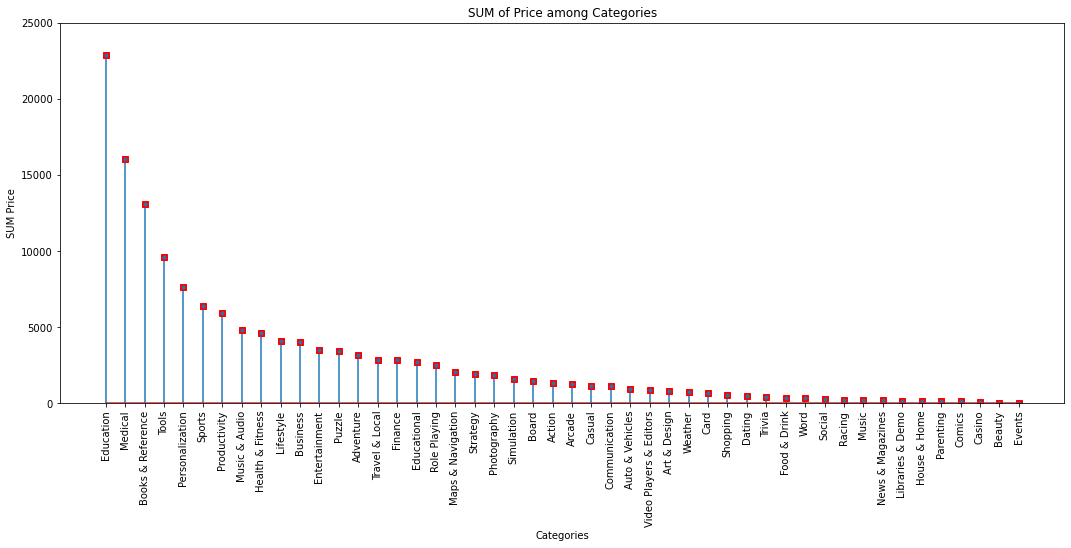

In [42]:
# Price (Sum)
plt.figure(figsize=(18,7))
plt.plot(Sum_Price,'bs', color='red')
plt.xticks(rotation=90)
plt.title('SUM of Price among Categories')
plt.xlabel('Categories')
plt.ylabel('SUM Price')

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

plt.stem(Sum_Price, markerfmt='.')
plt.ylim([0, 25000])
plt.show()

In [43]:
Sum_Price

Category
Education                  22886.852206
Medical                    16091.302677
Books & Reference          13097.185782
Tools                       9608.510000
Personalization             7646.552622
Sports                      6390.490000
Productivity                5944.790000
Music & Audio               4814.070000
Health & Fitness            4604.098597
Lifestyle                   4120.540000
Business                    4052.140000
Entertainment               3506.040000
Puzzle                      3468.620000
Adventure                   3173.670000
Travel & Local              2880.109014
Finance                     2842.750000
Educational                 2703.630000
Role Playing                2495.364404
Maps & Navigation           2032.030000
Strategy                    1954.806578
Photography                 1889.140000
Simulation                  1635.160000
Board                       1474.810000
Action                      1355.710000
Arcade                      130

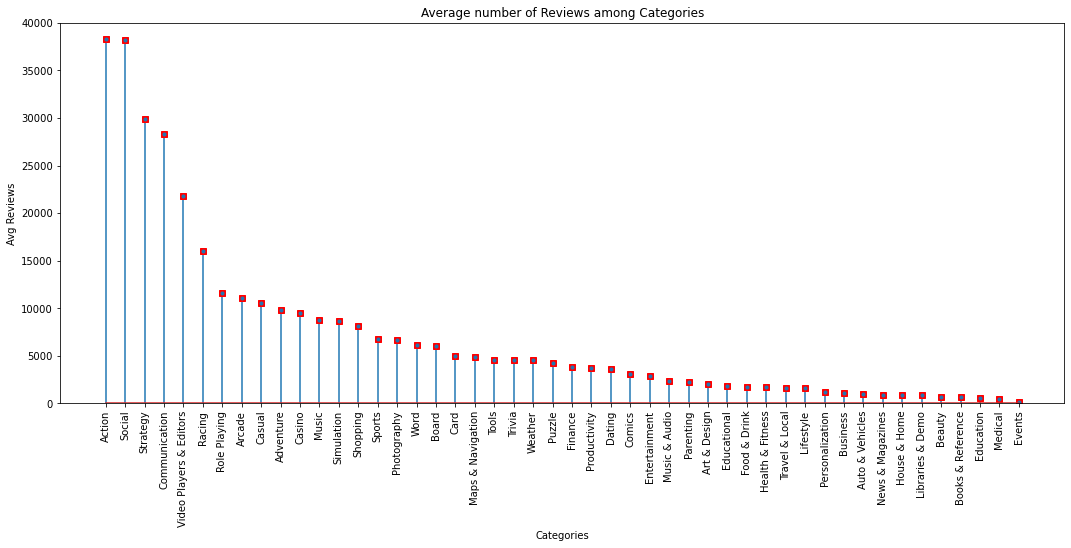

In [44]:
# Reviews (Avg)
plt.figure(figsize=(18,7))
plt.plot(Avg_Reviews,'bs', color='red')
plt.xticks(rotation=90)
plt.title('Average number of Reviews among Categories')
plt.xlabel('Categories')
plt.ylabel('Avg Reviews')

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

plt.stem(Avg_Reviews, markerfmt='.')
plt.ylim([0, 40000])
plt.show()

In [45]:
Avg_Reviews

Category
Action                     38280.814277
Social                     38190.336597
Strategy                   29875.978723
Communication              28310.902555
Video Players & Editors    21819.629358
Racing                     16068.219930
Role Playing               11566.071331
Arcade                     11110.938045
Casual                     10569.767902
Adventure                   9861.728296
Casino                      9532.322327
Music                       8789.913793
Simulation                  8652.528205
Shopping                    8140.665281
Sports                      6793.092708
Photography                 6686.009564
Word                        6163.815244
Board                       6028.222008
Card                        4945.004208
Maps & Navigation           4847.621492
Tools                       4536.340870
Trivia                      4521.169514
Weather                     4519.944213
Puzzle                      4253.967334
Finance                     379

In [46]:
google_playstore.isnull().sum()

App Name                 0
App Id                   0
Category                 0
Rating                   0
Rating Count             0
Installs                 0
Minimum Installs         0
Free                     0
Price                    0
Currency                 0
Size                     0
Released                 0
Last update              0
Content Rating           0
In app purchases         0
Reviews                  0
Android version Text     0
Developer                0
Developer Internal ID    0
dtype: int64

# Correlations

Which column has highest correlations among one another?

In [47]:
google_corr = google_playstore.corr()
google_corr

,Rating,Rating Count,Minimum Installs,Free,Price,In app purchases,Reviews,Developer Internal ID
Rating,1.000000,0.006111,0.002823,-0.043448,0.012032,0.006797,0.006488,0.007153
Rating Count,0.006111,1.000000,0.588584,0.005967,-0.001778,0.028371,0.975300,-0.007735
Minimum Installs,0.002823,0.588584,1.000000,0.006234,-0.001857,0.015410,0.526891,-0.010289
Free,-0.043448,0.005967,0.006234,1.000000,-0.296914,0.068312,0.005978,0.008398
Price,0.012032,-0.001778,-0.001857,-0.296914,1.000000,-0.020505,-0.001775,-0.000694
In app purchases,0.006797,0.028371,0.015410,0.068312,-0.020505,1.000000,0.030239,0.003950
Reviews,0.006488,0.975300,0.526891,0.005978,-0.001775,0.030239,1.000000,-0.007228
Developer Internal ID,0.007153,-0.007735,-0.010289,0.008398,-0.000694,0.003950,-0.007228,1.000000


In [48]:
google_playstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450782 entries, 0 to 450794
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   App Name               450782 non-null  object        
 1   App Id                 450782 non-null  object        
 2   Category               450782 non-null  object        
 3   Rating                 450782 non-null  float64       
 4   Rating Count           450782 non-null  float64       
 5   Installs               450782 non-null  object        
 6   Minimum Installs       450782 non-null  float64       
 7   Free                   450782 non-null  bool          
 8   Price                  450782 non-null  float64       
 9   Currency               450782 non-null  object        
 10  Size                   450782 non-null  object        
 11  Released               450782 non-null  datetime64[ns]
 12  Last update            450782 non-null  date

In [49]:
# Chaning columns with non numerical values to find correlation

google_col = google_playstore

for i in google_col.columns:
    if google_col[i].dtype == 'object':
        google_col[i] = google_col[i].astype('category')
        google_col[i] = google_col[i].cat.codes
    elif google_col[i].dtype == 'bool':
        google_col[i] = google_col[i].astype('category')
        google_col[i] = google_col[i].cat.codes
    elif google_col[i].dtype == 'datetime64[ns]':
        google_col[i] = google_col[i].astype('category')
        google_col[i] = google_col[i].cat.codes

google_col  

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Free,Price,Currency,Size,Released,Last update,Content Rating,In app purchases,Reviews,Android version Text,Developer,Developer Internal ID
0,193927,127346,15,4.090909,66.0,5,10000.0,1,0.0,43,812,2721,2184,1,0,28.0,40,61663,4.656450e+18
1,109354,127366,29,4.000000,8.0,4,1000.0,1,0.0,43,807,2646,2109,1,0,3.0,40,61663,4.656450e+18
2,88830,127330,15,3.866667,15.0,5,10000.0,1,0.0,43,811,2720,2183,1,0,3.0,40,61663,4.656450e+18
3,207444,127325,15,4.000000,18.0,15,5000.0,1,0.0,43,812,2696,2159,1,0,7.0,40,61663,4.656450e+18
4,52039,127347,15,4.023256,86.0,16,50000.0,1,0.0,43,811,2685,2263,1,0,29.0,40,61663,4.656450e+18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450790,260192,133429,33,4.240000,875.0,6,100000.0,1,0.0,43,236,1986,3257,1,0,257.0,51,18291,5.362130e+18
450791,192625,133433,31,2.961539,52.0,5,10000.0,1,0.0,43,957,3873,3336,1,0,26.0,55,18291,5.362130e+18
450792,271965,133435,28,3.500000,64.0,5,10000.0,1,0.0,43,1368,3836,3557,1,0,41.0,66,18291,5.362130e+18
450793,207958,397448,13,4.195592,0.0,15,5000.0,1,0.0,43,1529,3756,3289,1,0,17.0,75,25168,7.185660e+18


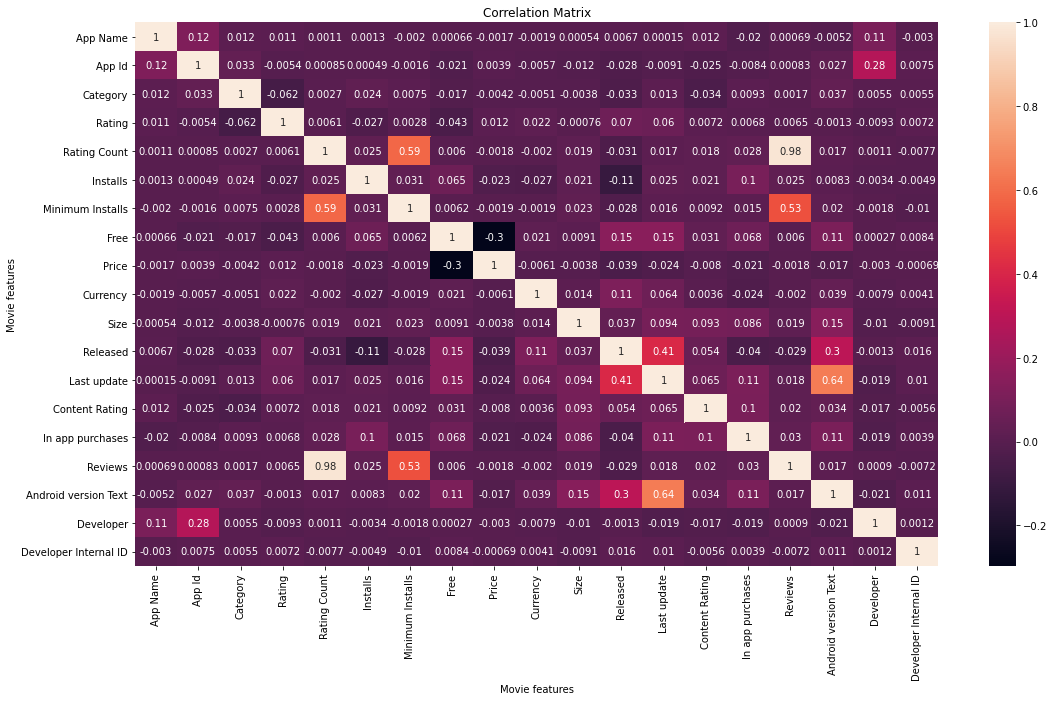

In [50]:
playstore_corr = google_col.corr(method='pearson')

plt.figure(figsize=(18,10))

sns.heatmap(playstore_corr, annot = True)

plt.title("Correlation Matrix")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()


In [51]:
updated_corr = google_col.corr()
unstacked = updated_corr.unstack()
sorted_corr = unstacked.sort_values()
sorted_corr

correlated_pairs = sorted_corr[((sorted_corr) > 0.4) & ((sorted_corr) < 1)]
correlated_pairs.drop_duplicates()

Last update   Released                0.410804
Reviews       Minimum Installs        0.526891
Rating Count  Minimum Installs        0.588584
Last update   Android version Text    0.643211
Reviews       Rating Count            0.975300
dtype: float64

**Reviews and Rating Count** have the highest correlation followed by the correlation between **Last update and Android version Text**

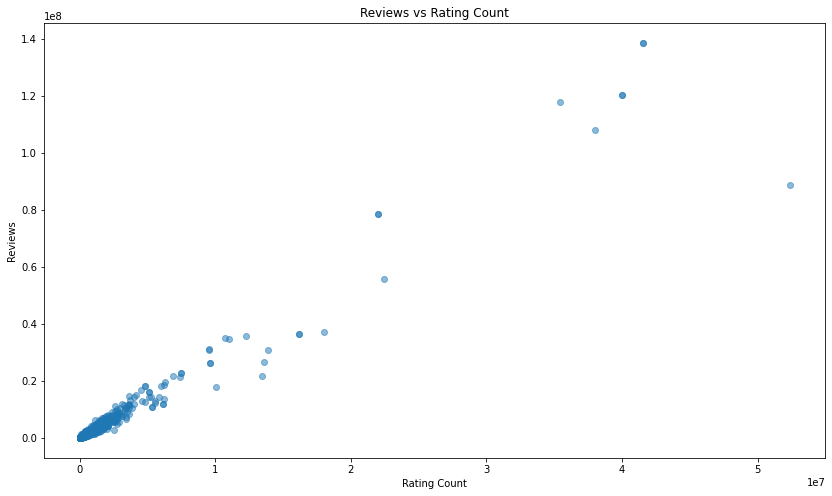

In [52]:
#Scatter plot:
plt.figure(figsize = (14,8))
plt.scatter(x=google_playstore['Reviews'], y=google_playstore['Rating Count'], alpha=0.5)
plt.title('Reviews vs Rating Count')
plt.xlabel('Rating Count')
plt.ylabel('Reviews')
plt.show()


<AxesSubplot:title={'center':'Reviews vs Rating Count'}, xlabel='Reviews', ylabel='Rating Count'>

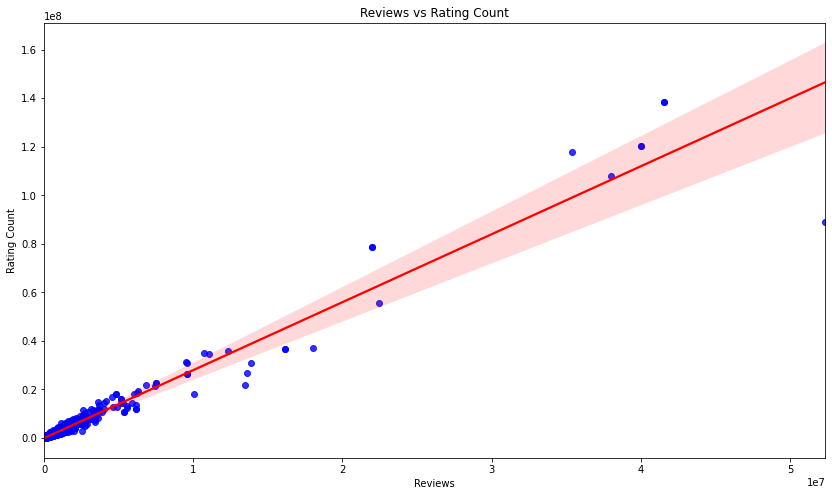

In [53]:
plt.figure(figsize = (14,8))
plt.title('Reviews vs Rating Count')
sns.regplot(x="Reviews", y="Rating Count", data=google_playstore, scatter_kws = {'color': 'blue'}, line_kws = {'color': 'red'})